# **Logistic Regression on Diabetes Dataset**

## **I. Data Preprocessing**

### **Importing the dataset**

In [2]:
import pandas as pd 
#from google.colab import files
#uploaded = files.upload()
diabetes_df = pd.read_csv(r"C:\Users\pangi\Downloads\Diabetes.csv")
diabetes_df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Data shuffling**

In [7]:
diabetes_df['Outcome'].unique()

array([1, 0])

In [8]:
shuffling_df = diabetes_df.sample(frac=1.0, random_state=42)
shuffling_df.reset_index(drop=True, inplace=True)
shuffling_df.shape

(768, 9)

### **Getting the inputs and output**

In [9]:
X=shuffling_df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26
764,1,96,122,0,0,22.4,0.207,27
765,10,101,86,37,0,45.6,1.136,38
766,0,141,0,0,0,42.4,0.205,29


In [10]:
y=shuffling_df['Outcome']
y.unique()
y

0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    1
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### **Creating the training set and the test set**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,115,66,39,140,38.1,0.150,28
73,0,95,85,25,36,37.4,0.247,24
352,4,197,70,39,744,36.7,2.329,31
497,0,117,80,31,53,45.2,0.089,24
145,8,84,74,31,0,38.3,0.457,39
...,...,...,...,...,...,...,...,...
71,4,83,86,19,0,29.3,0.317,34
106,2,141,58,34,128,25.4,0.699,24
270,4,90,0,0,0,28.0,0.610,31
435,7,97,76,32,91,40.9,0.871,32


In [13]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0,129,80,0,0,31.2,0.703,29
324,2,108,80,0,0,27.0,0.259,52
624,3,139,54,0,0,25.6,0.402,22
690,2,146,0,0,0,27.5,0.240,28
473,6,134,70,23,130,35.4,0.542,29
...,...,...,...,...,...,...,...,...
554,4,99,72,17,0,25.6,0.294,28
319,2,117,90,19,71,25.2,0.313,21
594,2,83,66,23,50,32.2,0.497,22
6,1,71,48,18,76,20.4,0.323,22


In [14]:
y_train

357    0
73     1
352    0
497    0
145    0
      ..
71     0
106    0
270    0
435    1
102    1
Name: Outcome, Length: 576, dtype: int64

In [15]:
y_test

668    0
324    1
624    1
690    1
473    1
      ..
554    0
319    0
594    0
6      0
615    0
Name: Outcome, Length: 192, dtype: int64

### **Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled)

[[-0.28110838 -0.14720196 -0.14880844 ...  0.8264856  -0.98281574
  -0.45671501]
 [-1.17733585 -0.77018748  0.86397738 ...  0.7360544  -0.68828889
  -0.79626692]
 [ 0.01763411  2.40703868  0.06440962 ...  0.64562319  5.63341121
  -0.20205107]
 ...
 [ 0.01763411 -0.92593387 -3.66690658 ... -0.47830752  0.41390954
  -0.20205107]
 [ 0.91386157 -0.70788893  0.38423673 ...  1.18821043  1.20639933
  -0.11716309]
 [ 2.7063165   0.19544008  1.13049997 ...  1.51117903  0.33192784
   0.73171669]]


## **II. Building and training the model**

### **Building the model**

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### **Training the model**

In [18]:
model.fit(X_train_scaled, y_train)

### **Inference**
Making the predictions of the data points in the test set

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.])

#### Making the prediction of a single data point with:

1. **Pregnancies:** 2
2. **Glucose:** 122
3. **BloodPressure:** 70
4. **SkinThickness:** 27
5. **Insulin:** 0
6. **BMI:** 36.8
7. **DiabetesPedigreeFunction:** 0.340
8. **Age:** 27


In [21]:
df = pd.DataFrame({'Pregnancies':[6],
                   'Glucose':[148],
                   'BloodPressure':[72],
                   'SkinThickness':[35],
                   'Insulin':[0],
                   'BMI':[33.6],
                   'DiabetesPedigreeFunction':[0.627],
                   'Age':[50],
                   'Outcome':[3]}) 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,3


In [22]:
data_for_predicting = pd.concat([diabetes_df, df])
data_for_predicting

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [23]:
X_train_for_predicting = data_for_predicting[['Pregnancies', 
                                              'Glucose', 
                                              'BloodPressure', 
                                              'SkinThickness', 
                                              'Insulin', 
                                              'BMI', 
                                              'DiabetesPedigreeFunction', 
                                              'Age']][:768]

In [24]:
y_train_for_predicting = data_for_predicting[['Outcome']][:768].values.reshape(-1,1)

In [25]:
X_test_for_predicting = data_for_predicting[['Pregnancies', 
                                             'Glucose', 
                                             'BloodPressure', 
                                             'SkinThickness', 
                                             'Insulin', 
                                             'BMI', 
                                             'DiabetesPedigreeFunction', 
                                             'Age']][768:]

In [26]:
Model_for_predicting = LogisticRegression() # C=10, random_state=0

In [27]:
Model_for_predicting.fit(X_train_for_predicting, y_train_for_predicting.ravel())

In [28]:
y_predict = Model_for_predicting.predict(X_test_for_predicting)

In [29]:
y_predict

array([0.])

In [30]:
if y_predict == 1:
  print("Diabetic")
else:
  print("Normal")

Normal


## **III. Evaluating the model**

### **Confusion Matrix**

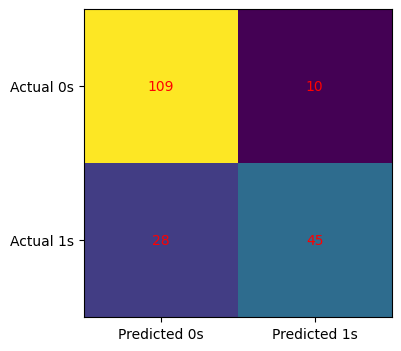

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red') 
plt.show()

### **ROC Curve**

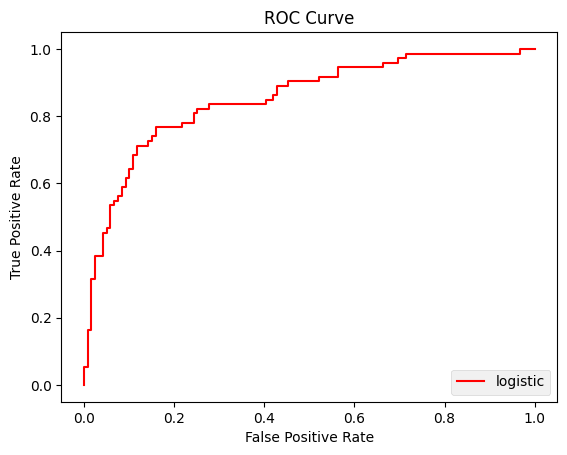

In [ ]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label='logistic',color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.style.use('bmh')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.show()

### **Accuracy, Precision, Recall and F1-score test**

In [33]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       119
           1       0.82      0.62      0.70        73

    accuracy                           0.80       192
   macro avg       0.81      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_test = accuracy_score(y_test,y_pred)
precision_test = precision_score(y_test,y_pred)
recall_test = recall_score(y_test,y_pred)
f1_test = f1_score(y_test,y_pred)


print(f"Accuracy:", accuracy_test)
print(f"Precision:", precision_test)
print(f"Recall:", recall_test)
print(f"F1-score:", f1_test)

Accuracy: 0.8020833333333334
Precision: 0.8181818181818182
Recall: 0.6164383561643836
F1-score: 0.703125


### **IV. Visualizations**

### **Scatterplot**

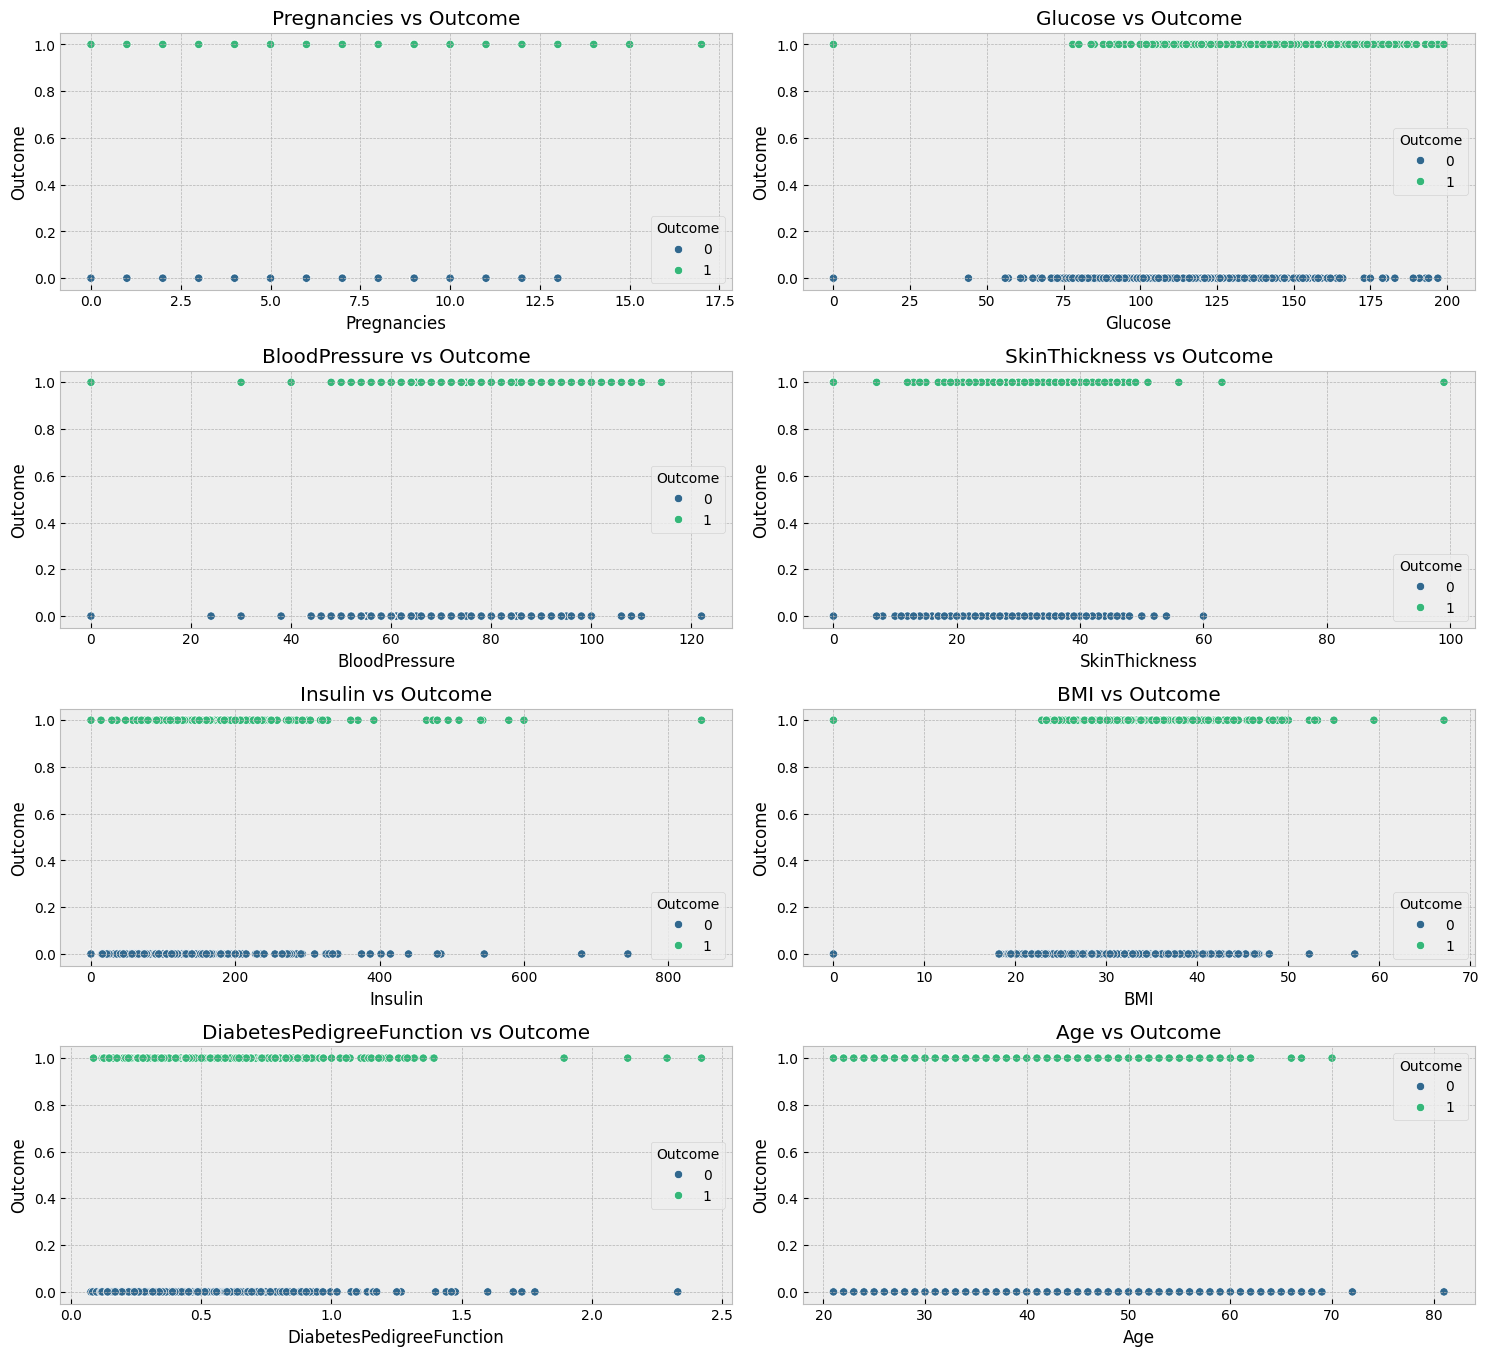

In [35]:
import seaborn as sns
features = diabetes_df.drop(columns="Outcome").columns
plt.figure(figsize=(15, 20))


for i, col in enumerate(features, 1):
    plt.subplot(6, 2, i)
    sns.scatterplot(data=diabetes_df, x=col, y='Outcome',hue='Outcome',palette='viridis')
    plt.title(f"{col} vs Outcome")
    plt.xlabel(col)
    plt.ylabel("Outcome")

plt.tight_layout()
plt.show()

## **Correlation Heatmap**

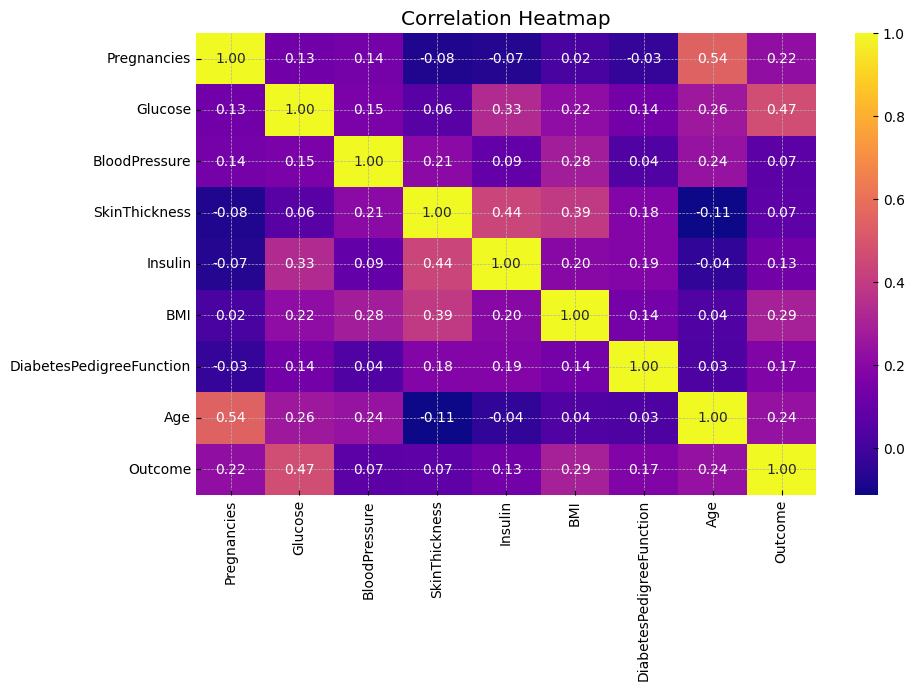

In [36]:
plt.figure(figsize=(10, 6)  )
sns.heatmap(diabetes_df.corr(),
            annot=True, cmap='plasma', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### V. About 

Machine learning in healthcare requires almost accuracy and precise performance. This model performed about average performance in regards to detecting diabetes condition of a patient as an outcome. The model employs logistic regression wherein the following variables are pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, DiabetesPedigreeFunction and Age. The vairables were the patient's health demographics that often monitored and concluded by the helath professional. The data preprocessing of the model uses feature scaling for standardization of data in each columns of data set, since logistic regression utilizes gradient descent optimization for faster convergence. In addition to this data Shuffling was used in order to increase its performance for a random feed to the model.  All in all, the machine learning model made for diabetes shows 80% accuracy and precision, 70% f1-score and roughly 62% recall. Furthermore, recommendations includes hyperparameter tuning of the model and discrete approach in handling of missing values in dataset.    